# Regression

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score



sns.set_style('whitegrid')

In [2]:
df_train = pd.read_csv('./processed_data/merged_dataset_train.csv', sep=';', index_col=0, na_values='NA')
df_test = pd.read_csv('./processed_data/merged_dataset_test.csv', sep=';', index_col=0, na_values='NA')

features = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b8a', 'VWC_Avg.']

bands = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b8a']

df_train = df_train.dropna(subset=features)
df_test = df_test.dropna(subset=features)



X_train = df_train[bands]
Y_train = df_train['VWC_Avg.']

X_test = df_test[bands]
Y_test = df_test['VWC_Avg.']


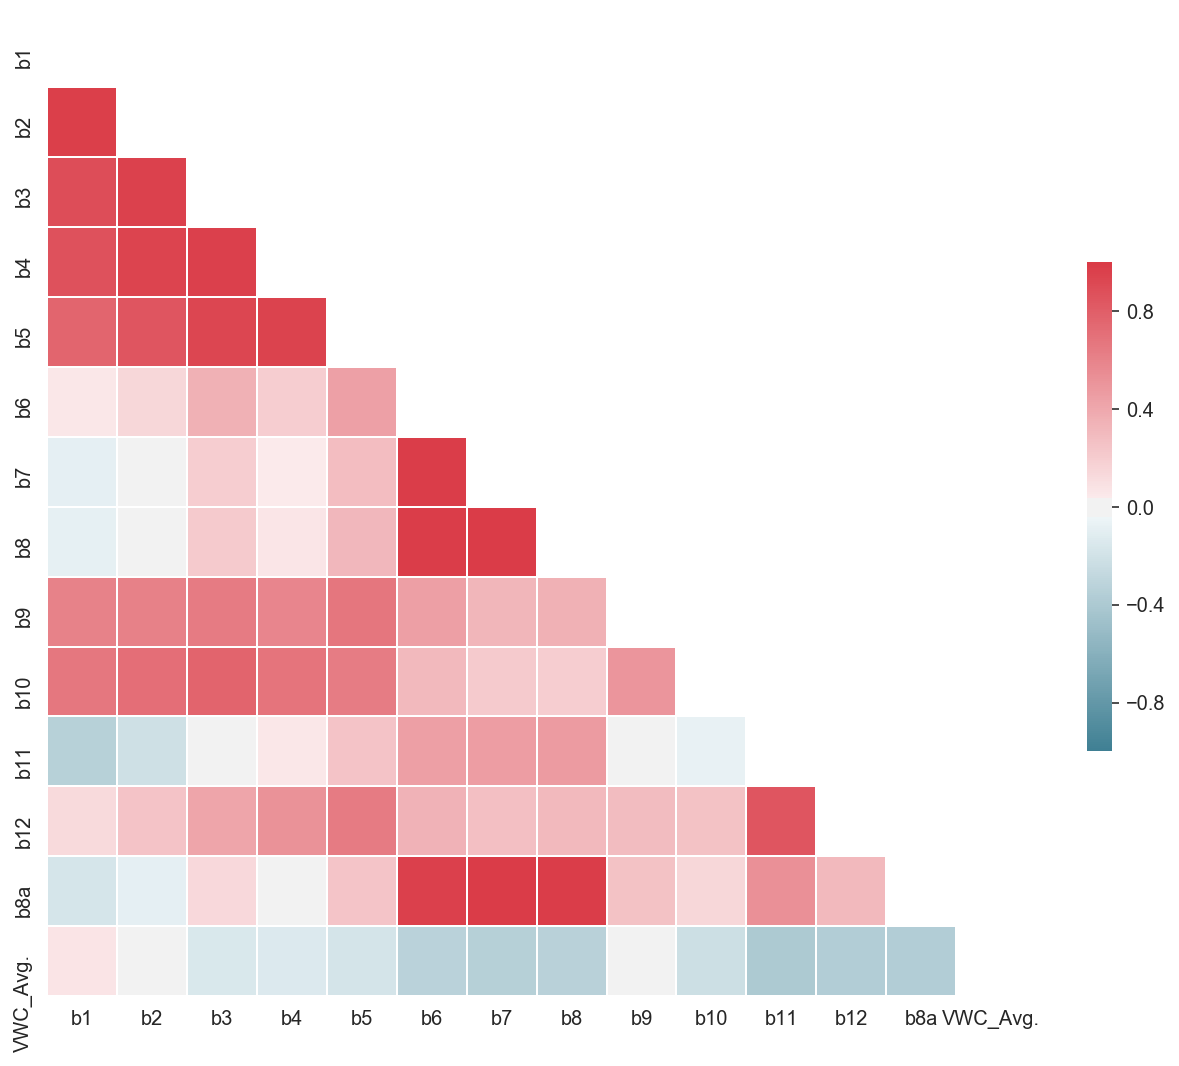

In [3]:
df = pd.read_csv('./processed_data/merged_dataset.csv', sep=';', index_col=0, na_values='NA')

corr = df[features].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('./plots/correlation_after_processing.pdf')
plt.show()

### Random Forest

In [4]:

regr_rf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)
regr_rf.fit(X_train, Y_train)
predictions_rf = regr_rf.predict(X_test)
prediction_train = regr_rf.predict(X_train)
print(r2_score(Y_test, predictions_rf), r2_score(Y_train, prediction_train))


0.47583396873513284 0.8796473880678518


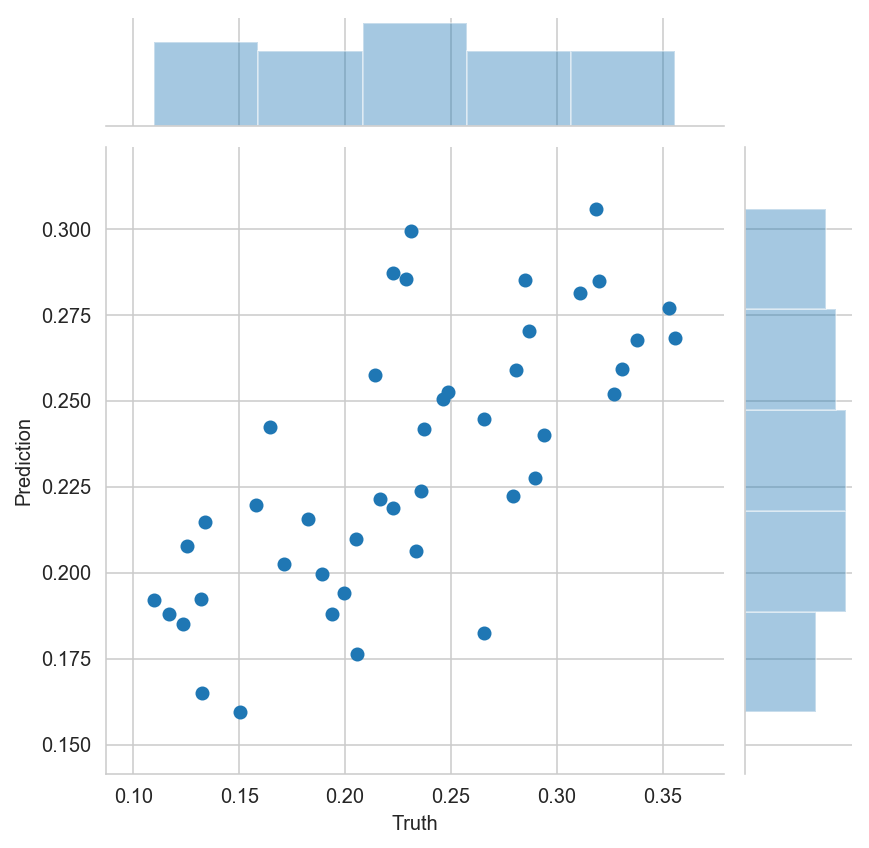

In [5]:
df_tp = pd.DataFrame(data={'Truth':Y_test, 'Prediction':predictions_rf})
sns.jointplot('Truth', 'Prediction', df_tp)
plt.savefig('random_forrest_truth_pred_random.pdf', dpi=300)

In [6]:


regr_et = ExtraTreesRegressor(n_estimators=10000, random_state=0, n_jobs=-1)
regr_et.fit(X_train, Y_train)
predictions_et = regr_et.predict(X_test)
prediction_train = regr_et.predict(X_train)
print(r2_score(Y_test, predictions_et), r2_score(Y_train, prediction_train))


0.44595851003847564 0.999999963085925


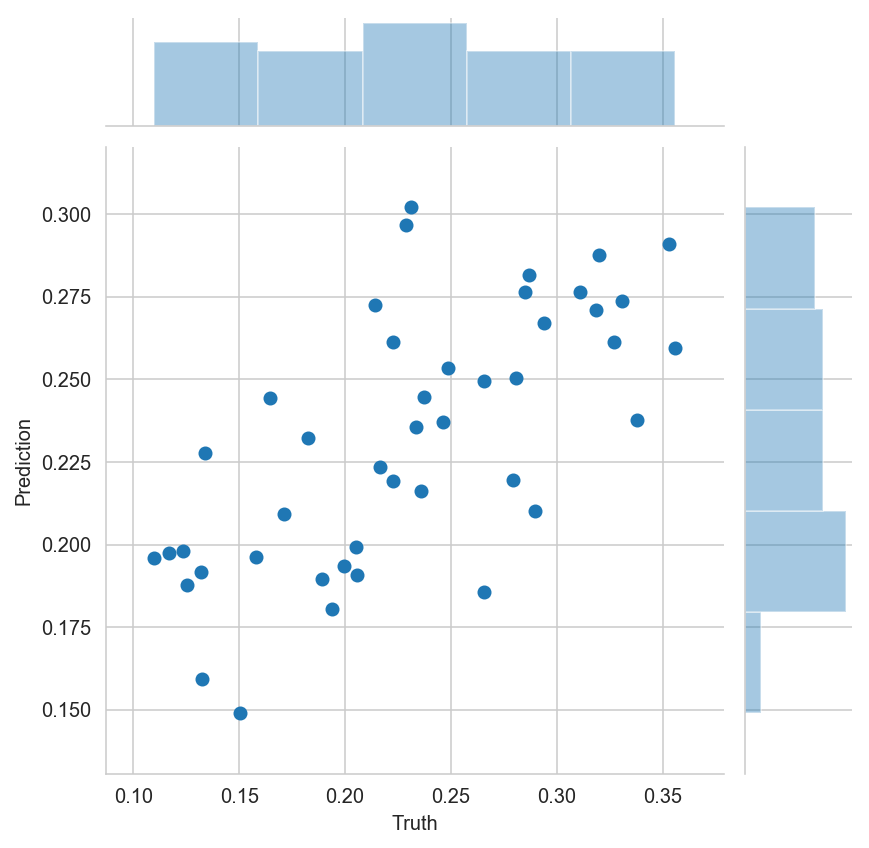

In [7]:
df_tp = pd.DataFrame(data={'Truth':Y_test, 'Prediction':predictions_et})
sns.jointplot('Truth', 'Prediction', df_tp)
plt.savefig('extra_trees_truth_pred.pdf', dpi=300)

### SVM

In [8]:
params_svm = {'C':np.logspace(-10, 10, 10), 'gamma':np.logspace(-10,10,10)}
svm = SVR()
regr_svm = GridSearchCV(svm, params_svm, n_jobs=-1) 
regr_svm.fit(X_train, Y_train) 

print(regr_svm.best_params_)
regr_svm = regr_svm.best_estimator_



{'C': 0.07742636826811278, 'gamma': 1.6681005372000592e-08}


In [9]:
regr_svm.fit(X_train, Y_train)

predictions_svm = regr_svm.predict(X_test)
print(r2_score(Y_test, predictions_svm))

0.07667247044644354


# random split

In [11]:
df_train = pd.read_csv('./processed_data/merged_dataset_train_random.csv', sep=';', index_col=0, na_values='NA')
df_test = pd.read_csv('./processed_data/merged_dataset_test_random.csv', sep=';', index_col=0, na_values='NA')

features = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b8a', 'VWC_Avg.']

bands = ['b1', 'b2', 'b3', 'b4', 'b5', 'b6', 'b7', 'b8', 'b9', 'b10', 'b11', 'b12', 'b8a']

df_train = df_train.dropna(subset=features)
df_test = df_test.dropna(subset=features)



X_train = df_train[bands]
Y_train = df_train['VWC_Avg.']

X_test = df_test[bands]
Y_test = df_test['VWC_Avg.']

## random forrest

In [13]:
regr_rf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)
regr_rf.fit(X_train, Y_train)
predictions_rf = regr_rf.predict(X_test)
prediction_train = regr_rf.predict(X_train)
print(r2_score(Y_test, predictions_rf), r2_score(Y_train, prediction_train))

0.31645667473047356 0.891212904723668


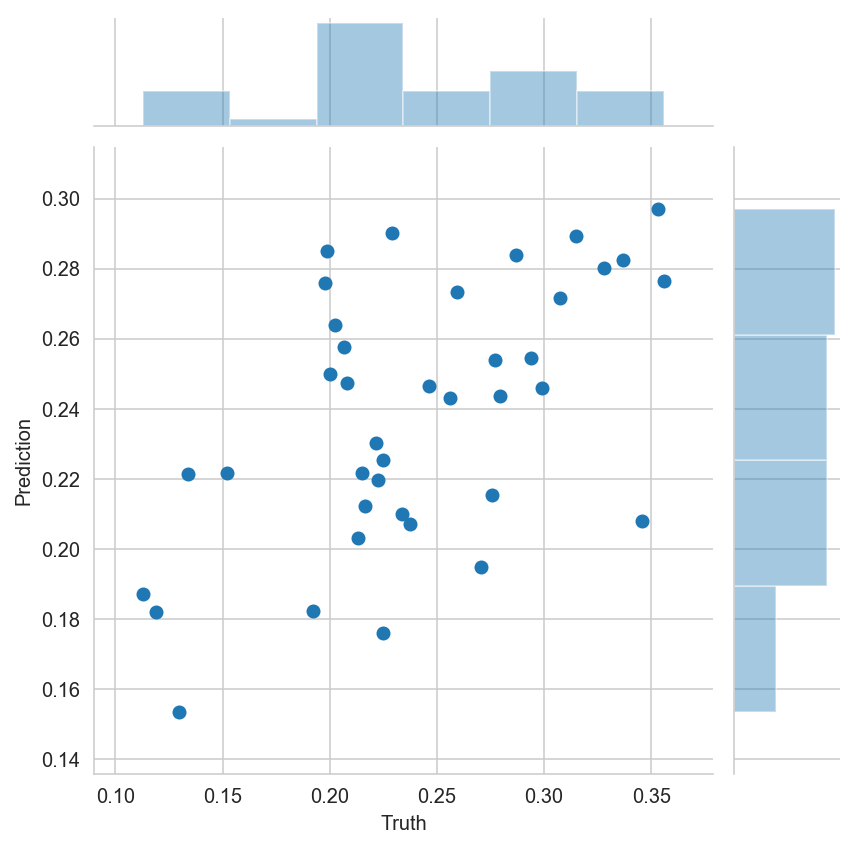

In [14]:
df_tp = pd.DataFrame(data={'Truth':Y_test, 'Prediction':predictions_rf})
sns.jointplot('Truth', 'Prediction', df_tp)
plt.savefig('random_forrest_truth_pred_random.pdf', dpi=300)

In [15]:
regr_et = ExtraTreesRegressor(n_estimators=10000, random_state=0, n_jobs=-1)
regr_et.fit(X_train, Y_train)
predictions_et = regr_et.predict(X_test)
prediction_train = regr_et.predict(X_train)
print(r2_score(Y_test, predictions_et), r2_score(Y_train, prediction_train))


0.3637830671784613 0.9999999547530941


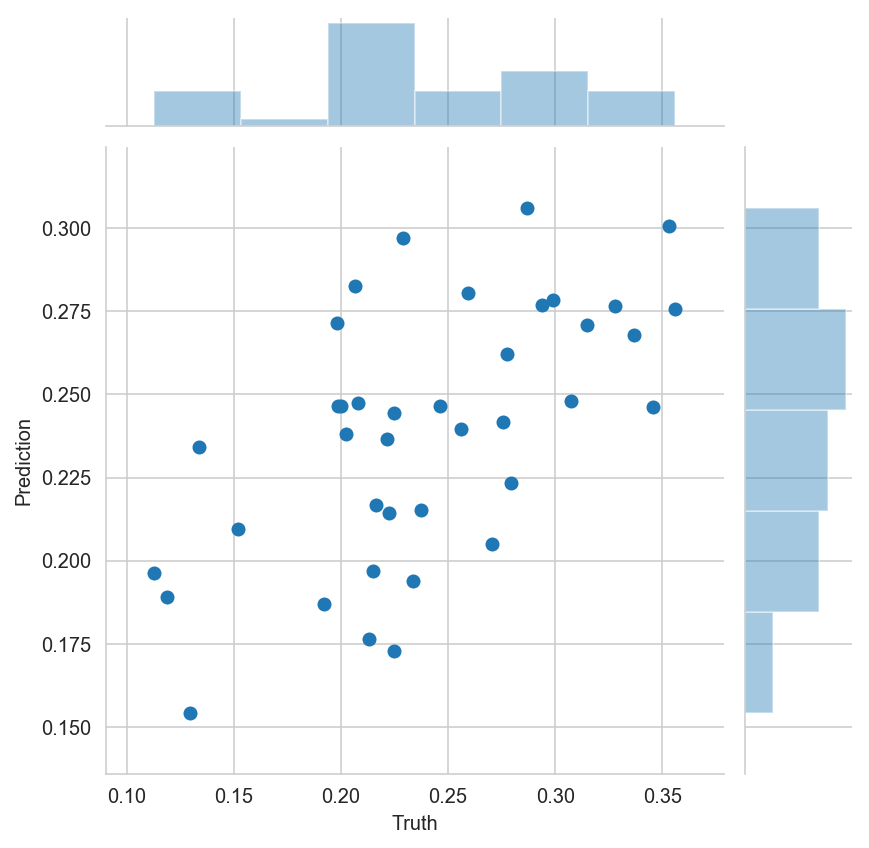

In [16]:
df_tp = pd.DataFrame(data={'Truth':Y_test, 'Prediction':predictions_et})
sns.jointplot('Truth', 'Prediction', df_tp)
plt.savefig('extra_trees_truth_pred_random.pdf', dpi=300)

## SVR

In [17]:
params_svm = {'C':np.logspace(-10, 10, 10), 'gamma':np.logspace(-10,10,10)}
svm = SVR()
regr_svm = GridSearchCV(svm, params_svm, n_jobs=-1) 
regr_svm.fit(X_train, Y_train) 

print(regr_svm.best_params_)
regr_svm = regr_svm.best_estimator_



{'C': 2154.4346900318865, 'gamma': 1e-10}


In [18]:
regr_svm.fit(X_train, Y_train)

predictions_svm = regr_svm.predict(X_test)
print(r2_score(Y_test, predictions_svm))

0.14988048261485576
